### 자연어처리(NLP) 맛보기

#### Java 설치하기
```
https://www.oracle.com/technetwork/java/javase/downloads/index.html
```
으로 접속해서 **Java SE 8 버전(x64)**을 설치한다.

#### **konlpy** 패키지 설치하기
konlpy와 함께 가장 많이 쓰는 라이브러리는 **NLTK**이지만 여기서는 konlpy를 쓰기로 한다.
```
conda install -c conda-forge jpype1
pip install konlpy
```

In [27]:
from konlpy.tag import Okt

In [28]:
s = '''
나는 자랑스러운 태극기 앞에
'''

In [29]:
t = Okt()
t.nouns(s)

['나', '태극기', '앞']

In [30]:
t.pos(s)

[('\n', 'Foreign'),
 ('나', 'Noun'),
 ('는', 'Josa'),
 ('자랑스러운', 'Adjective'),
 ('태극기', 'Noun'),
 ('앞', 'Noun'),
 ('에', 'Josa'),
 ('\n', 'Foreign')]

collections 패키지에서 Counter라는 객체는 숫자를 세주는 역할을 한다

In [31]:
from collections import Counter #

In [32]:
my = [1,1,2,3,3,3,2]
c = Counter(my)
c

Counter({1: 2, 2: 2, 3: 3})

In [33]:
print(c.most_common())

[(3, 3), (1, 2), (2, 2)]


In [34]:
c = Counter(t.nouns(s))
c.most_common()

[('나', 1), ('태극기', 1), ('앞', 1)]

경제 관련된 뉴스 기사 링크를 따오기 위해서 새로운 라이브러리 설치한다
```
pip install feedparser
```

In [35]:
import feedparser

In [38]:
url = 'https://rss.joins.com/joins_money_list.xml'
jfeed = feedparser.parse(url)
links = [entry['link'] for entry in jfeed['entries']]
links

['https://news.joins.com/article/23319967?cloc=rss|news|economy',
 'https://news.joins.com/article/23319970?cloc=rss|news|economy',
 'https://news.joins.com/article/23319961?cloc=rss|news|economy',
 'https://news.joins.com/article/23319963?cloc=rss|news|economy',
 'https://news.joins.com/article/23319962?cloc=rss|news|economy',
 'https://news.joins.com/article/23319957?cloc=rss|news|economy',
 'https://news.joins.com/article/23319948?cloc=rss|news|economy',
 'https://news.joins.com/article/23319949?cloc=rss|news|economy',
 'https://news.joins.com/article/23319950?cloc=rss|news|economy',
 'https://news.joins.com/article/23319943?cloc=rss|news|economy',
 'https://news.joins.com/article/23319945?cloc=rss|news|economy',
 'https://news.joins.com/article/23319935?cloc=rss|news|economy',
 'https://news.joins.com/article/23319934?cloc=rss|news|economy',
 'https://news.joins.com/article/23319904?cloc=rss|news|economy',
 'https://news.joins.com/article/23319896?cloc=rss|news|economy',
 'https://

받은 링크를 통해서 기사 글자만 뽑아오기 위한 라이브러리를 설치하자
```
pip3 install newspaper3k
```

In [39]:
import newspaper

In [41]:
myTxt = ''
for lnk in links:
    article = newspaper.Article(lnk,language='ko')
    article.download()
    article.parse()
    myTxt += article.text
myTxt[:500]

'군사안보연구소는 중앙일보의 군사안보분야 전문 연구기관입니다.군사안보연구소는 2016년 10월 1일 중앙일보 홈페이지 조인스( https://news.joins.com )에 문을 연 ‘김민석의 Mr. 밀리터리’( https://news.joins.com/mm )를 운영하며 디지털 환경에 특화된 군사ㆍ안보ㆍ무기에 관한 콘텐트를 만들고 있습니다.연구소 사람들김민석 소장 : kimseok@joongang.co.kr (02-751-5511)국방연구원 전력발전연구부ㆍ군비통제센터를 거쳐 1994년 중앙일보에 입사한 국내 첫 군사전문기자다. 국방부를 출입한 뒤 최장수 국방부 대변인(2010~2016년)으로 활동했다. 현재는 군사안보전문기자 겸 논설위원으로 한반도 군사와 안보문제를 깊게 파헤치는 글을 쓰고 있다.박용한 연구위원 : park.yonghan@joongang.co.kr (02-751-5516)‘북한의 급변사태와 안정화 전략’을 주제로 북한학 박사를 받았다. 국방연구원 안보전략연구센터ㆍ군사'

In [42]:
len(myTxt)

22473

In [44]:
nData = t.nouns(myTxt)

In [52]:
c = Counter(nData)
nCount = c.most_common() # TOP10만 뽑자
nCount[:10]

[('군사', 190),
 ('안보', 171),
 ('연구소', 76),
 ('중앙', 76),
 ('일보', 76),
 ('센터', 76),
 ('북한', 76),
 ('등', 68),
 ('연구', 57),
 ('기자', 49)]

#### 뉴스 기사 단어를 워드클라우드 만들기

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus']=False

글자를 워드클라우드로 만들기 위해 다음과 같은 패키지를 설치한다
```
pip install wordcloud
```

In [54]:
from wordcloud import WordCloud

In [49]:
fpath = '~/라이브러리/Fonts/AppleGothic.ttf'
w = WordCloud(font_path = fpath,
              background_color='white',
              width = 800,
              height = 600
              )

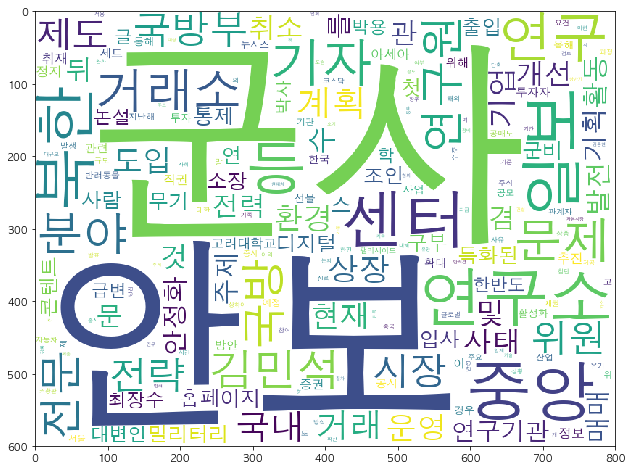

In [56]:
cloud = w.generate_from_frequencies(c)
plt.figure(figsize = (12,8))
plt.imshow(cloud)
plt.show()